In [142]:
import pandas as pd

# Load the data
sentiment_df = pd.read_csv('/Users/michael/Desktop/SpringData2024-main/data/regression/sentiment_regress.csv')
socio_df = pd.read_csv('/Users/michael/Desktop/SpringData2024-main/data/regression/socio_regress.csv')

# Display the first few rows of each dataframe to understand their structure
sentiment_df.head(), socio_df.head()

(  State  Drill    co2  drill_diff  co2_diff
 0    AL  61.39  67.15   10.762353 -3.742157
 1    AK  48.40  69.14   -2.227647 -1.752157
 2    AZ  52.80  71.21    2.172353  0.317843
 3    AR  55.77  67.11    5.142353 -3.782157
 4    CA  39.44  74.12  -11.187647  3.227843,
   State per_capita_income  Poverty_Percentage  Unemployment_Rate  \
 0    AL            30,458                15.8           5.400697   
 1    AK            39,236                10.4           6.918239   
 2    AZ            34,644                13.5           5.647841   
 3    AR            29,210                16.0           5.335628   
 4    CA            41,276                12.3           6.466877   
 
   Carpool_Estimate  mean_travel_time_to_work  Married_Percent  \
 0          177,167                      25.2              5.1   
 1           41,473                      19.5              3.5   
 2          325,297                      25.7              5.4   
 3          129,053                      22.0    

In [143]:
# Convert 'per_capita_income' to numeric, removing commas and converting to integer
socio_df['per_capita_income'] = socio_df['per_capita_income'].str.replace(',', '').astype(int)

# Merge the datasets on 'State'
merged_df = pd.merge(sentiment_df, socio_df, on='State')

# Check the merged dataframe
merged_df.head()

,State,Drill,co2,drill_diff,co2_diff,per_capita_income,Poverty_Percentage,Unemployment_Rate,Carpool_Estimate,mean_travel_time_to_work,Married_Percent,Self-Employ_Estimate,Social_Security_Estimate,Education_Estimate
0,AL,61.39,67.15,10.762353,-3.742157,30458,15.8,5.400697,"177,167",25.2,5.1,"119,566","678,923",42643
1,AK,48.40,69.14,-2.227647,-1.752157,39236,10.4,6.918239,"41,473",19.5,3.5,"22,208","63,037",2377
2,AZ,52.80,71.21,2.172353,0.317843,34644,13.5,5.647841,"325,297",25.7,5.4,"194,428","901,976",71571
3,AR,55.77,67.11,5.142353,-3.782157,29210,16.0,5.335628,"129,053",22.0,5.8,"82,895","411,368",27533
4,CA,39.44,74.12,-11.187647,3.227843,41276,12.3,6.466877,"1,756,016",29.5,5.2,"1,439,628","3,673,578",434774


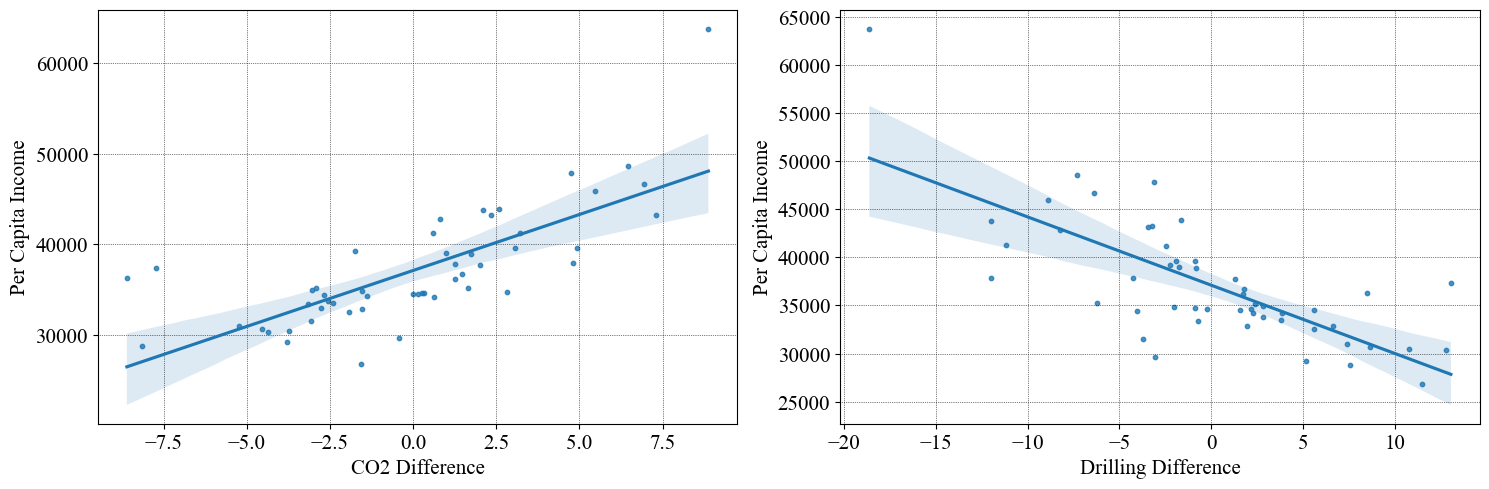

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Setting up the matplotlib figure for the updated request (only 2 regressions)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Updated titles for the plots
titles = ['CO2 Difference vs. Per Capita Income',
          'Drilling Difference vs. Per Capita Income']

# Updated variables for plotting (excluding mean travel time to work)
variables = [('co2_diff', 'per_capita_income'),
             ('drill_diff', 'per_capita_income')]

# Loop through the defined variables and create a regplot for each, excluding mean travel time to work
for ax, (x_var, y_var), title in zip(axs.flat, variables, titles):
    sns.regplot(x=x_var, y=y_var, data=merged_df, ax=ax, scatter_kws={'s': 10})  # make the dots smaller
    title_parts = title.split(' vs. ')
    ax.set_ylabel(title_parts[1], fontsize=15)  # change y label to second part of title
    ax.set_xlabel(title_parts[0], fontsize=15)  # change x label to first part of title
    ax.tick_params(axis='both', which='major', labelsize=15)  # change axes size

    # Add major dotted axes
    ax.grid(which='major', color='black', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

In [145]:
from scipy import stats

# Prepare for more detailed statistical analysis
analysis_results = []

for X_var, y_var in variables:
    X = merged_df[X_var]
    y = merged_df[y_var]
    
    # Perform linear regression analysis using scipy.stats.linregress
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    
    # Store the results
    analysis_results.append({
        'variables': (X_var, y_var),
        'slope': slope,
        'intercept': intercept,
        'r_value': r_value,
        'p_value': p_value,
        'std_err': std_err,
        'r_squared': r_value**2
    })

analysis_results

[{'variables': ('co2_diff', 'per_capita_income'),
  'slope': 1235.6634998300663,
  'intercept': 37099.37254901961,
  'r_value': 0.7516867793760238,
  'p_value': 2.062693611240649e-10,
  'std_err': 154.8793130747553,
  'r_squared': 0.5650330142886991},
 {'variables': ('drill_diff', 'per_capita_income'),
  'slope': -711.0177158924674,
  'intercept': 37099.37254901961,
  'r_value': -0.7363641627358473,
  'p_value': 7.352214994220685e-10,
  'std_err': 93.32808773687128,
  'r_squared': 0.5422321801616653}]

The p-values for both regressions are significantly low, indicating that the relationships between CO2 difference and per capita income, and between drilling difference and per capita income, are statistically significant.